## Data Cleaning/Exploration Project - Delving into polling data of a videogame

To give some context and background information regarding the dataset for this project, Runescape is a multiplayer game where players from all over the world play and interact with each other. Once or twice a month, the game developers will release a poll, stating that they would like to make certain changes to the game. The players then get to vote on this, and the changes will only be made if more than 75 percent of players vote in agreement for it. This dataset contains previous polling data from years past. Without further ado, let's dive right into the dataset!

In [2]:
import pandas as pd
from pandas import read_excel
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [3]:
my_sheet='Sheet1'
file_name='runescapePollingData.xlsx'
df=read_excel(file_name, sheet_name=my_sheet)

In [4]:
print(df.head())

   Unnamed: 0                                           Question   Yes    No  \
0           0  The Easter 2007 event is re-activated for East...  84.7  15.4   
1           1  ‘Unidentified herbs’ are changed to become ‘gr...  52.2  47.9   
2           2  A command is added to toggle the visibility of...  88.1  12.0   
3           3  On the log-in screen, pressing the 'enter' key...  83.3  16.8   
4           4  Pressing the 'tab' key starts a reply to your ...  87.1  13.0   

   Skip  yesVotes  noVotes  skipVotes  passed  totalVotes  peakPlayers  \
0   0.0     85875    15532          0       1      101407        63108   
1   0.0     52891    48516          0       0      101407        63108   
2   0.0     89306    12101          0       1      101407        63108   
3   0.0     84436    16971          0       1      101407        63108   
4   0.0     88233    13174          0       1      101407        63108   

        Date                                        websiteLink  \
0 2013-

In [5]:
print(df.shape)
print(df.dtypes)

(1794, 14)
Unnamed: 0              int64
Question               object
Yes                   float64
No                    float64
Skip                  float64
yesVotes                int64
noVotes                 int64
skipVotes               int64
passed                  int64
totalVotes              int64
peakPlayers             int64
Date           datetime64[ns]
websiteLink            object
Title                  object
dtype: object


In [6]:
df_numeric=df.select_dtypes(include=[np.number])
numeric_cols=df_numeric.columns.values
print(numeric_cols)

['Unnamed: 0' 'Yes' 'No' 'Skip' 'yesVotes' 'noVotes' 'skipVotes' 'passed'
 'totalVotes' 'peakPlayers']


In [7]:
df_non_numeric=df.select_dtypes(exclude=[np.number])
non_numeric_cols=df_non_numeric.columns.values
print(non_numeric_cols)

['Question' 'Date' 'websiteLink' 'Title']


Having succesfully read in the data and ran some lines of code to get a brief idea of what the dataset is about, we can observe that the dataset contains 1794 rows and 14 columns. We also have quite a couple of numeric and non-numeric columns. Now, let's try to find out if there is missing data present.

In [8]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0.0%
Question - 0.0%
Yes - 0.0%
No - 0.0%
Skip - 0.0%
yesVotes - 0.0%
noVotes - 0.0%
skipVotes - 0.0%
passed - 0.0%
totalVotes - 0.0%
peakPlayers - 0.0%
Date - 0.0%
websiteLink - 0.0%
Title - 0.0%


Seems almost too good to be true that our data has no missing data/NaN values. Let's run another test just to be sure.

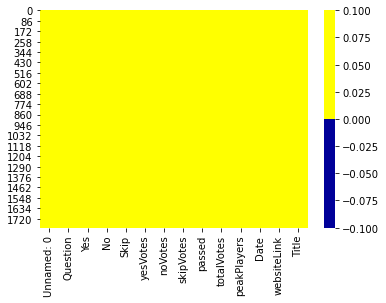

In [9]:
cols = df.columns
colours = ['#000099', '#ffff00'] #yellow represents not missing, blue represents missing
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

It does seem like our data doesn't have any missing values, but what about outliers? Let us now check for outliers in our dataset. To do this, let's do a histogram plot for some of the numerical columns. 

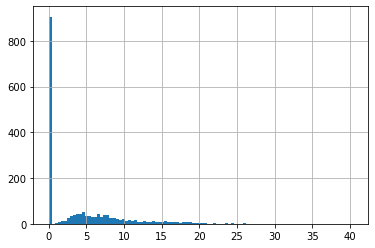

In [10]:
df['Skip'].hist(bins=100)

The data looks highly skewed with the possible existence of outliers. Let's do a boxplot to confirm this. 

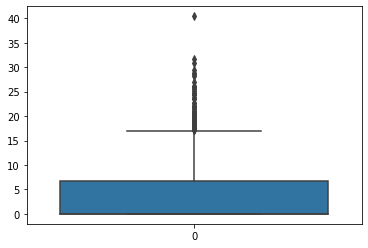

In [11]:
newcol=df['Skip']
sns.boxplot(data=newcol)

The boxplot is rather peculiar. It shows a high concentration of values from 0 to 5, and then we suddenly have a clump of 'outliers' ranging from 18 to 40, that is if we go by the usual definition of outliers being greater than Q3 + 1.5 * IQR. But in this case, we have to remember that the 'Skip' column represents percentage values, it represents the percentage of players who skipped each vote. Going by that definition, 40 is still a logical value, and hence these 'outliers' will not be omitted. There does not seem to be any input error in this situation. In order to be really, really sure about things, let's just run the describe() function on this column.  



In [12]:
df['Skip'].describe()

count    1794.000000
mean        4.115775
std         5.624689
min         0.000000
25%         0.000000
50%         0.000000
75%         6.800000
max        40.400000
Name: Skip, dtype: float64

The mean percentage of players who skip voting over the years is around 4 percent, which is pretty good from a player participation standpoint. The rest of the results from the describe() function only serve to confirm what I mentioned earlier, that 40 percent was the greatest value, and the bulk of values being around 0 percent.

I am still a little curious about the distribution of data for this column. Did the number of players who skipped voting drastically increase in a very short time, or was it just a few random times where a lot of people simply decided to skip voting? Let's answer these questions a little while later, and continue to explore and clear up outliers for the other numerical columns first.

The 'skipvotes', 'passed', 'totalvotes' and 'peakplayer' columns seem fairly straightforward, so let's check for outliers in the 'yesvotes' and 'novotes' columns, since these two columns are of greater meaning/value and will be valuable for further analysis later on. Since the dataset is rather clean, let's first run the describe() function on these two columns to look for outliers. 

In [13]:
df['yesVotes'].describe()

count     1794.000000
mean     27161.005574
std      11494.938775
min       4866.000000
25%      17954.500000
50%      26605.500000
75%      33061.500000
max      89306.000000
Name: yesVotes, dtype: float64

In [14]:
df['noVotes'].describe()

count     1794.000000
mean      6137.143813
std       4884.423022
min        498.000000
25%       2877.000000
50%       4522.000000
75%       7618.250000
max      48516.000000
Name: noVotes, dtype: float64

It does not seem like the two columns contain outliers which are due to error in inputting that need to be removed. The max and min values for both columns are well within the runescape total population amount and are logical. 

Also, having used the describe function on the the 'novotes', 'yesvotes' and 'skip' columns, we also have some summary statistics on these important columns. The mean percentage of people who skip votes for each poll is around 4 percent, which is a pretty low and good number. The mean amount of yes votes is around 27000 and that for no votes is around 6000 for each poll, which are also very healthy numbers showing a good amount of player feedback, as well as player agreement and disagreement with poll content. 

Now that we have largely screened the data for missing values and outliers, let's look at removing uninformative/repetitive data. 

Earlier on when we ran the head() function, it seemed like the 'totalvotes' and 'peakplayers' columns had the same values for all their rows. Let's check if this is true, and if true, we can remove these two columns as they wouldn't contribute much to our analysis. 

In [15]:
totalvotes=df['totalVotes']
bool_condition=df['totalVotes']==101407
counts=totalvotes[bool_condition].count()
print(counts)

9


In [16]:
print(df['totalVotes'])

0       101407
1       101407
2       101407
3       101407
4       101407
         ...  
1789     70339
1790     70339
1791     70339
1792     68740
1793     68740
Name: totalVotes, Length: 1794, dtype: int64


Well, it seems like I was wrong for the 'totalvotes' column, and there are indeed other different values in it. Now let's check the 'peakplayers' column.

In [17]:
totalvotes2=df['peakPlayers']
bool_condition2=df['peakPlayers']==63108
counts1=totalvotes[bool_condition2].count()
print(counts1)

9


Turns out that there are also other values in the 'peakplayers' column. 

Now that we have a fairly good idea about what our data is about, and also having mostly ensured that the data is all proper and correct, we can start to look at transforming/modifying it to make it more ready for further analysis. Let's begin by removing some of the columns that we won't need.

In [18]:
df1=df.drop(columns=['websiteLink', 'Question','Title','Unnamed: 0'])
df1.head()

,Yes,No,Skip,yesVotes,noVotes,skipVotes,passed,totalVotes,peakPlayers,Date
0,84.7,15.4,0.0,85875,15532,0,1,101407,63108,2013-03-14
1,52.2,47.9,0.0,52891,48516,0,0,101407,63108,2013-03-14
2,88.1,12.0,0.0,89306,12101,0,1,101407,63108,2013-03-14
3,83.3,16.8,0.0,84436,16971,0,1,101407,63108,2013-03-14
4,87.1,13.0,0.0,88233,13174,0,1,101407,63108,2013-03-14


We've gotten rid of all non-numerical columns so that it will be easier to run some preliminary statistical/exploratory analysis later on. We are almost ready to do some visualizations/analysis, but something is still not quite right in one of the columns, and that is the 'Date' column. I am not interested in the exact date, down to the day of each poll. I would be more interested to observe the trends according to year, so let's edit the values in this column to show that. 

In [20]:
df1['Date']=df1['Date'].astype(str)
df1['Date']=df1['Date'].str[:4]
df1['Date']=df1['Date'].astype(int)
df1.head()

,Yes,No,Skip,yesVotes,noVotes,skipVotes,passed,totalVotes,peakPlayers,Date
0,84.7,15.4,0.0,85875,15532,0,1,101407,63108,2013
1,52.2,47.9,0.0,52891,48516,0,0,101407,63108,2013
2,88.1,12.0,0.0,89306,12101,0,1,101407,63108,2013
3,83.3,16.8,0.0,84436,16971,0,1,101407,63108,2013
4,87.1,13.0,0.0,88233,13174,0,1,101407,63108,2013


Alright, now that we have successfully cut away the day and month for the 'Date' column and converted all values in that column to integer values, there is one last thing to do before doing some visualizations. There are still a few redundant columns in df1. The 'yes' and 'yesVotes' columns, along with their no counterparts, basically describe the same thing, just that one is in percentage form and the other is not. This is the same for the 'skip' column. Let's remove all the redundant columns.

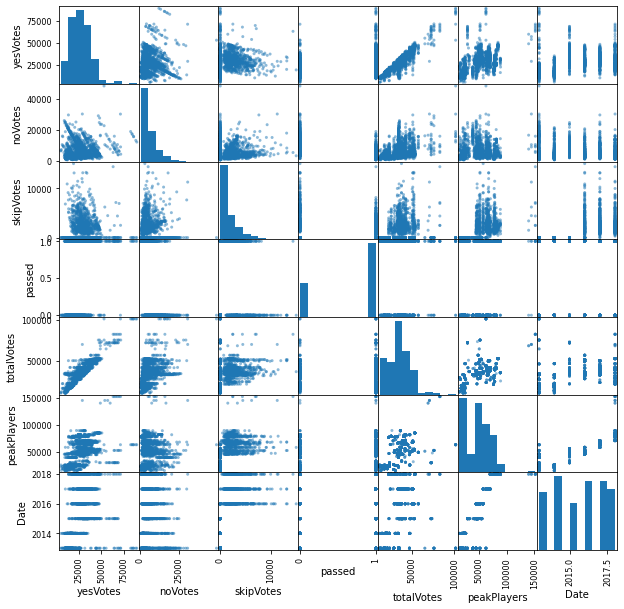

In [21]:
df2=df1.drop(columns=['Yes', 'No', 'Skip'])
pd.plotting.scatter_matrix(df2,figsize=(10,10));

From the scatter matrix above, we can already begin to observe some interesting relationships. Earlier on, we asked the question of whether the number of people who skipped voting had a sudden/drastic increase at some point. The scatter plot tells us yes! The number of people who skipped voting was negligible and close to zero from 2013 to 2015, but in 2016 there was a huge uptick in people who skipped voting, and this persisted for the years to come. There is perhaps some weak/moderately positive correlation between time/year and skipped votes. We will delve into this further as we plot a correlation matrix later on. 

The number of peak players also appeared to steadily increase with time! We all think runescape is a dying game and already has one foot in the coffin, but the scatterplot says otherwise. 

The last bit interesting information seems to be a vague positive correlation between no votes and skipped votes. When more people voted no, more people also tended to skip that particular vote.

Let's do up a correlation matrix so that we can better understand everything in terms of numbers.

In [22]:
df2.corr()

,yesVotes,noVotes,skipVotes,passed,totalVotes,peakPlayers,Date
yesVotes,1.000000,0.053712,0.148651,0.318583,0.915768,0.519608,0.396344
noVotes,0.053712,1.000000,-0.006622,-0.621908,0.416011,0.067428,-0.117530
skipVotes,0.148651,-0.006622,1.000000,-0.228225,0.291477,0.568844,0.613133
passed,0.318583,-0.621908,-0.228225,1.000000,0.009821,0.030982,0.075664
totalVotes,0.915768,0.416011,0.291477,0.009821,1.000000,0.571288,0.402662
peakPlayers,0.519608,0.067428,0.568844,0.030982,0.571288,1.000000,0.890811
Date,0.396344,-0.117530,0.613133,0.075664,0.402662,0.890811,1.000000


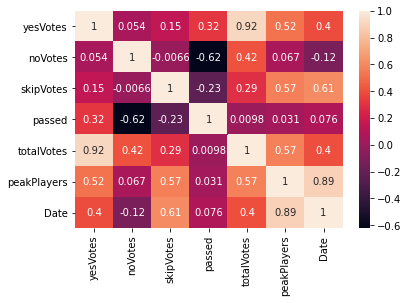

In [23]:
sns.heatmap(df2.corr(), annot=True)

Looking at the annotated heatmap, we are able to confirm the statements that we made earlier. There is indeed a very strong positive correlation (0.89) between peak players and date! This is a great sign for the game and the players, and shows that the game is well and alive, showing continued positive growth in peak player population. 

The correlation between yes votes and total votes is 0.92, but this is pretty much to be expected. More players voting yes generally implies more players voted. There is also moderate positive correlation (0.61) between skipped votes and date as well. This could have implied that over time, perhaps players became more nonchalant/couldn't be bothered about voting as they were already satisfied with the existing game and did not have strong opinions about future changes to be made to the game. 

The other values are pretty straightforward/self-explanatory, such as a negative correlation between no votes and passed (-0.61). More no votes would of course hurt the chances of a vote being passed. 

To end off this short analysis project, just to satisfy my own curiosity, I would like to find out the voting topics with the highest number of yes votes, where the players were really looking forward to those important updates/additions, and also the voting topics with the most number of no votes, where players were vehemently against the new additions. 

In [24]:
new_df=df.sort_values(by=['yesVotes'],ascending=False)
new_df=new_df.drop(columns=['Unnamed: 0','Yes','No','Skip','noVotes','skipVotes','passed','totalVotes','peakPlayers','Title'])
new_df.head()

,Question,yesVotes,Date,websiteLink
2,A command is added to toggle the visibility of...,89306,2013-03-14,http://services.runescape.com/m=poll/oldschool...
4,Pressing the 'tab' key starts a reply to your ...,88233,2013-03-14,http://services.runescape.com/m=poll/oldschool...
0,The Easter 2007 event is re-activated for East...,85875,2013-03-14,http://services.runescape.com/m=poll/oldschool...
5,Right-click on a private message to start repl...,85652,2013-03-14,http://services.runescape.com/m=poll/oldschool...
3,"On the log-in screen, pressing the 'enter' key...",84436,2013-03-14,http://services.runescape.com/m=poll/oldschool...


In [25]:
new_df1=df.sort_values(by=['noVotes'],ascending=False)
new_df1=new_df1.drop(columns=['Unnamed: 0','Yes','No','Skip','yesVotes','skipVotes','passed','totalVotes','peakPlayers','Title'])
new_df1.head()

,Question,noVotes,Date,websiteLink
1,‘Unidentified herbs’ are changed to become ‘gr...,48516,2013-03-14,http://services.runescape.com/m=poll/oldschool...
1791,Should the upcoming Spellbook filters for desk...,30308,2018-11-15,http://services.runescape.com/m=poll/oldschool...
6,"A few ‘Free’ worlds are made available, so PKe...",30260,2013-03-14,http://services.runescape.com/m=poll/oldschool...
1184,Should the Abyssal bludgeon be made smaller?,29688,2017-01-19,http://services.runescape.com/m=poll/oldschool...
10,Players will be permitted to return to Ape Ato...,29146,2013-04-04,http://services.runescape.com/m=poll/oldschool...


And so, we can observe from the above results that many people voted yes for 'quality of life' changes to be made to the game, such as the addition of more shortcut keys to shorten login time, and make other actions simpler and easier. And also, many people voted no for cosmetic changes, such as making the bludgeon smaller.